In [1]:
import tradingeconomics as te
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


In [2]:
te.login('jupyter:jupyter') # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

In [3]:

raw_forecast = te.getForecastData(country= ['portugal'], indicator=['inflation rate'],output_type='df')

final_date = raw_forecast.iloc[0]['LatestValueDate']
dt = datetime.strptime(final_date, '%Y-%m-%dT%H:%M:%S')
dt= f"{dt.year}-{dt.month}-{dt.day}"
dt

raw_inflation = te.getHistoricalData(country='portugal', indicator='inflation rate', initDate='2018-01-01', endDate=dt, output_type='df')

In [4]:
historical_inflation= raw_inflation[['DateTime','Value']].rename(columns = {'Value': 'Inflation Rate'})
historical_inflation['Date'] = pd.DatetimeIndex(historical_inflation['DateTime'])
historical_inflation.set_index('Date', inplace=True)
del historical_inflation['DateTime']

real_inflation_index = len(historical_inflation)

dict_forecast = {
    'DateTime':
            [
                raw_forecast['LatestValueDate'].values[0],
                raw_forecast['q1_date'].values[0],
                raw_forecast['q2_date'].values[0],
                raw_forecast['q3_date'].values[0],
                raw_forecast['q4_date'].values[0]
            ], 
    'Forecast':
            [
                raw_forecast['LatestValue'].values[0],
                raw_forecast['q1'].values[0],
                raw_forecast['q2'].values[0],
                raw_forecast['q3'].values[0],
                raw_forecast['q4'].values[0]
            ]
}
df_forecast = pd.DataFrame(data=dict_forecast)
df_forecast['Date'] = pd.DatetimeIndex(df_forecast['DateTime'])
df_forecast.set_index('Date', inplace=True)
del df_forecast['DateTime']


frames = [historical_inflation, df_forecast]
df = pd.concat(frames)

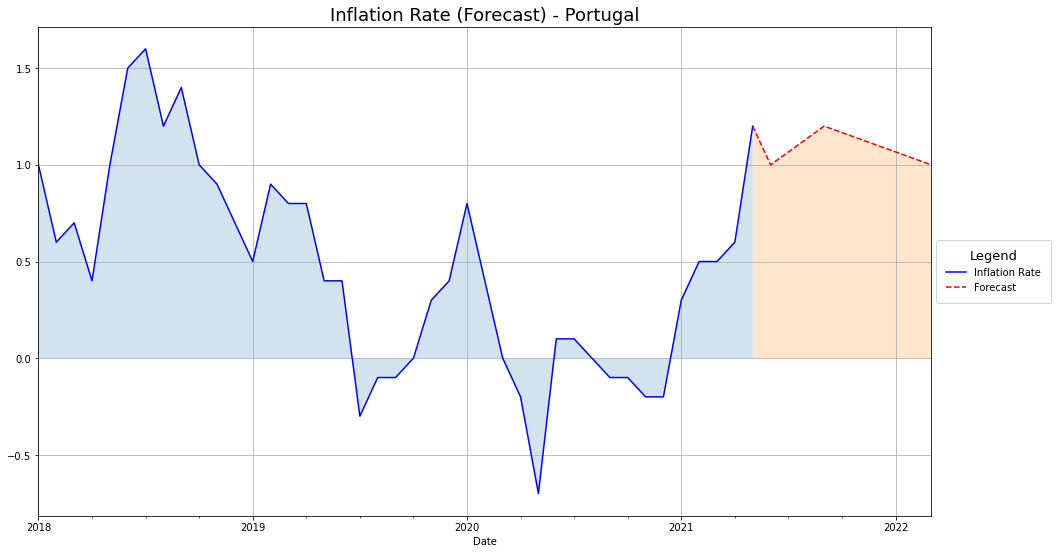

In [5]:

ax = df.iloc[:real_inflation_index,:]['Inflation Rate'].plot(ls="-", color="b", figsize=(16, 9))
ax1 =df.iloc[real_inflation_index-1:,:len(df)]['Forecast'].plot(ls="--", color="r", ax=ax)

ax.legend('ddd')
ax.set_title('Inflation Rate (Forecast) - Portugal', fontsize=18)
ax.legend(
          title="Legend",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=10,
          ncol=1,
          title_fontsize=13,
          borderpad=1)

ax.fill_between(df.index.tolist(), df['Inflation Rate'].values.tolist(),alpha=0.20)
ax1.fill_between(df.index.tolist(), df['Forecast'].values.tolist(),alpha=0.20)
plt.grid()
plt.show()
